### Importing Data 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [2]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

df_review_table = pd.read_csv("IMDB Dataset.csv")
df_review_table

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


#### Obtaining 10,000 entries to train the model faster

In [3]:
df_positive = df_review_table[df_review_table['sentiment']=='positive'][:9000]
df_negative = df_review_table[df_review_table['sentiment']=='negative'][:1000]

df_imdb_review = pd.concat([df_positive,df_negative])
df_imdb_review = pd.DataFrame(df_imdb_review)
df_imdb_review['sentiment'].value_counts()

positive    9000
negative    1000
Name: sentiment, dtype: int64

#### To observe the distribution of DataSet

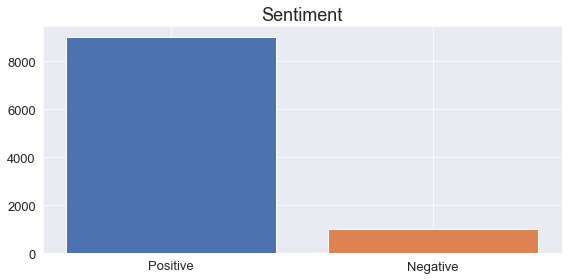

In [4]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_imdb_review['sentiment'].value_counts(),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [9]:
length_negative = len(df_imdb_review[df_imdb_review['sentiment']=='negative'])

df_review_positive = df_imdb_review[df_imdb_review['sentiment']=='positive'].sample(n=length_negative)

df_review_non_positive = df_imdb_review[~(df_imdb_review['sentiment']=='positive')]

df_review = pd.concat([
    df_review_positive, df_review_non_positive
])

df_review['sentiment'].value_counts()

df_review.reset_index(drop=True, inplace=True)

df_review

,review,sentiment
0,"This is a pretty silly film, including what ma...",positive
1,Gunga Din (1939) is based on Rudyard Kipling's...,positive
2,"Written by someone who has been there, you can...",positive
3,"I saw this pilot when it was first shown, and ...",positive
4,I really enjoyed this movie. The acting by the...,positive
...,...,...
1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,waste of 1h45 this nasty little film is one to...,negative
1998,Warning: This could spoil your movie. Watch it...,negative


In [11]:
print(df_imdb_review['sentiment'].value_counts())
print(df_review['sentiment'].value_counts())

positive    9000
negative    1000
Name: sentiment, dtype: int64
positive    1000
negative    1000
Name: sentiment, dtype: int64
